In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns


In [2]:
import sqlite3
conn = sqlite3.connect('../data/hist_prices.db')
c = conn.cursor()

In [3]:
data = pd.read_sql('''SELECT * FROM ethereum''', conn)
data.head()

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Ethereum,ETH,2015-08-08 23:59:59,2.798810,0.714725,2.793760,0.753325,674188.0,4.548689e+07
1,2,Ethereum,ETH,2015-08-09 23:59:59,0.879810,0.629191,0.706136,0.701897,532170.0,4.239957e+07
2,3,Ethereum,ETH,2015-08-10 23:59:59,0.729854,0.636546,0.713989,0.708448,405283.0,4.281836e+07
3,4,Ethereum,ETH,2015-08-11 23:59:59,1.131410,0.663235,0.708087,1.067860,1463100.0,6.456929e+07
4,5,Ethereum,ETH,2015-08-12 23:59:59,1.289940,0.883608,1.058750,1.217440,2150620.0,7.364501e+07


In [4]:
# Add some more features derived from the exiting ones
data['Range'] = data.High - data.Low
data['Difference'] = data.Close - data.Open

In [5]:
data.drop(labels='SNo', axis=1, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2160 entries, 0 to 2159
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Name        2160 non-null   object 
 1   Symbol      2160 non-null   object 
 2   Date        2160 non-null   object 
 3   High        2160 non-null   float64
 4   Low         2160 non-null   float64
 5   Open        2160 non-null   float64
 6   Close       2160 non-null   float64
 7   Volume      2160 non-null   float64
 8   Marketcap   2160 non-null   float64
 9   Range       2160 non-null   float64
 10  Difference  2160 non-null   float64
dtypes: float64(8), object(3)
memory usage: 185.8+ KB


In [6]:
#Converting Date column to Datetime
data['Date'] = pd.to_datetime(data['Date'])

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2160 entries, 0 to 2159
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Name        2160 non-null   object        
 1   Symbol      2160 non-null   object        
 2   Date        2160 non-null   datetime64[ns]
 3   High        2160 non-null   float64       
 4   Low         2160 non-null   float64       
 5   Open        2160 non-null   float64       
 6   Close       2160 non-null   float64       
 7   Volume      2160 non-null   float64       
 8   Marketcap   2160 non-null   float64       
 9   Range       2160 non-null   float64       
 10  Difference  2160 non-null   float64       
dtypes: datetime64[ns](1), float64(8), object(2)
memory usage: 185.8+ KB


In [8]:
data.describe()

,High,Low,Open,Close,Volume,Marketcap,Range,Difference
count,2160.000000,2160.000000,2160.000000,2160.000000,2.160000e+03,2.160000e+03,2160.000000,2160.000000
mean,398.258568,365.592589,382.879899,383.910691,7.057058e+09,4.172084e+10,32.665979,1.030792
std,628.082281,566.611523,599.719862,601.078766,1.064526e+10,6.909184e+10,76.578472,48.634243
min,0.482988,0.420897,0.431589,0.434829,1.021280e+05,3.221363e+07,0.018745,-921.977949
25%,14.265225,13.190950,13.757600,13.819200,3.825102e+07,1.135576e+09,1.535480,-2.645793
50%,205.124631,193.302715,198.425096,198.643691,2.148880e+09,2.070063e+10,8.748070,0.002800
75%,396.494561,375.146804,386.264935,386.435272,9.629136e+09,4.231010e+10,26.258711,4.218674
max,4362.350542,3785.848603,4174.635873,4168.701049,8.448291e+10,4.828819e+11,1485.475556,543.655080


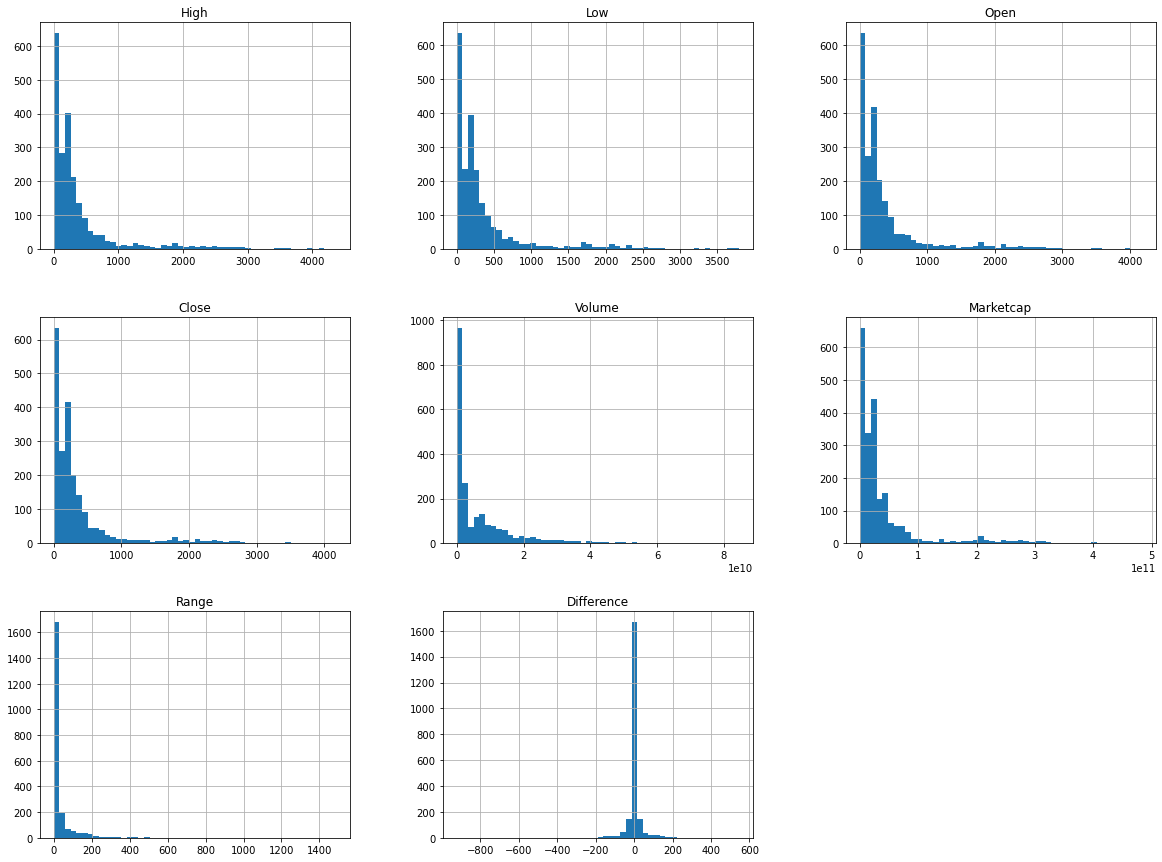

In [9]:
data[['High','Low','Open','Close','Volume','Marketcap','Range','Difference']].hist(bins=50, figsize = (20, 15))
plt.show();

In [10]:
#Days with the biggest price loss
data[['Date', 'Difference']].sort_values(by='Difference').head(10).T

,2111,2107,2104,2144,2113,2120,2109,1993,892,2026
Date,2021-05-19 23:59:59,2021-05-15 23:59:59,2021-05-12 23:59:59,2021-06-21 23:59:59,2021-05-21 23:59:59,2021-05-28 23:59:59,2021-05-17 23:59:59,2021-01-21 23:59:59,2018-01-16 23:59:59,2021-02-23 23:59:59
Difference,-921.977949,-437.829514,-388.787269,-356.870372,-341.719891,-322.562694,-298.945145,-261.113498,-238.940063,-211.205092


In [11]:
# Days with the biggest price gain
data[['Date', 'Difference']].sort_values(by='Difference', ascending=False).head(10).T

,2116,2095,2100,2106,2112,2123,2097,2103,2088,1975
Date,2021-05-24 23:59:59,2021-05-03 23:59:59,2021-05-08 23:59:59,2021-05-14 23:59:59,2021-05-20 23:59:59,2021-05-31 23:59:59,2021-05-05 23:59:59,2021-05-11 23:59:59,2021-04-26 23:59:59,2021-01-03 23:59:59
Difference,543.65508,479.910386,420.659601,358.935241,344.655459,327.746869,282.228597,220.42914,215.00371,200.995808


In [12]:
fig = px.line(data, x='Date', y="Close")
fig.show();

In [13]:
fig = px.line(data, x='Date', y="Marketcap")
fig.show();

In [14]:
fig = px.line(data, x='Date', y="Difference")
fig.show();

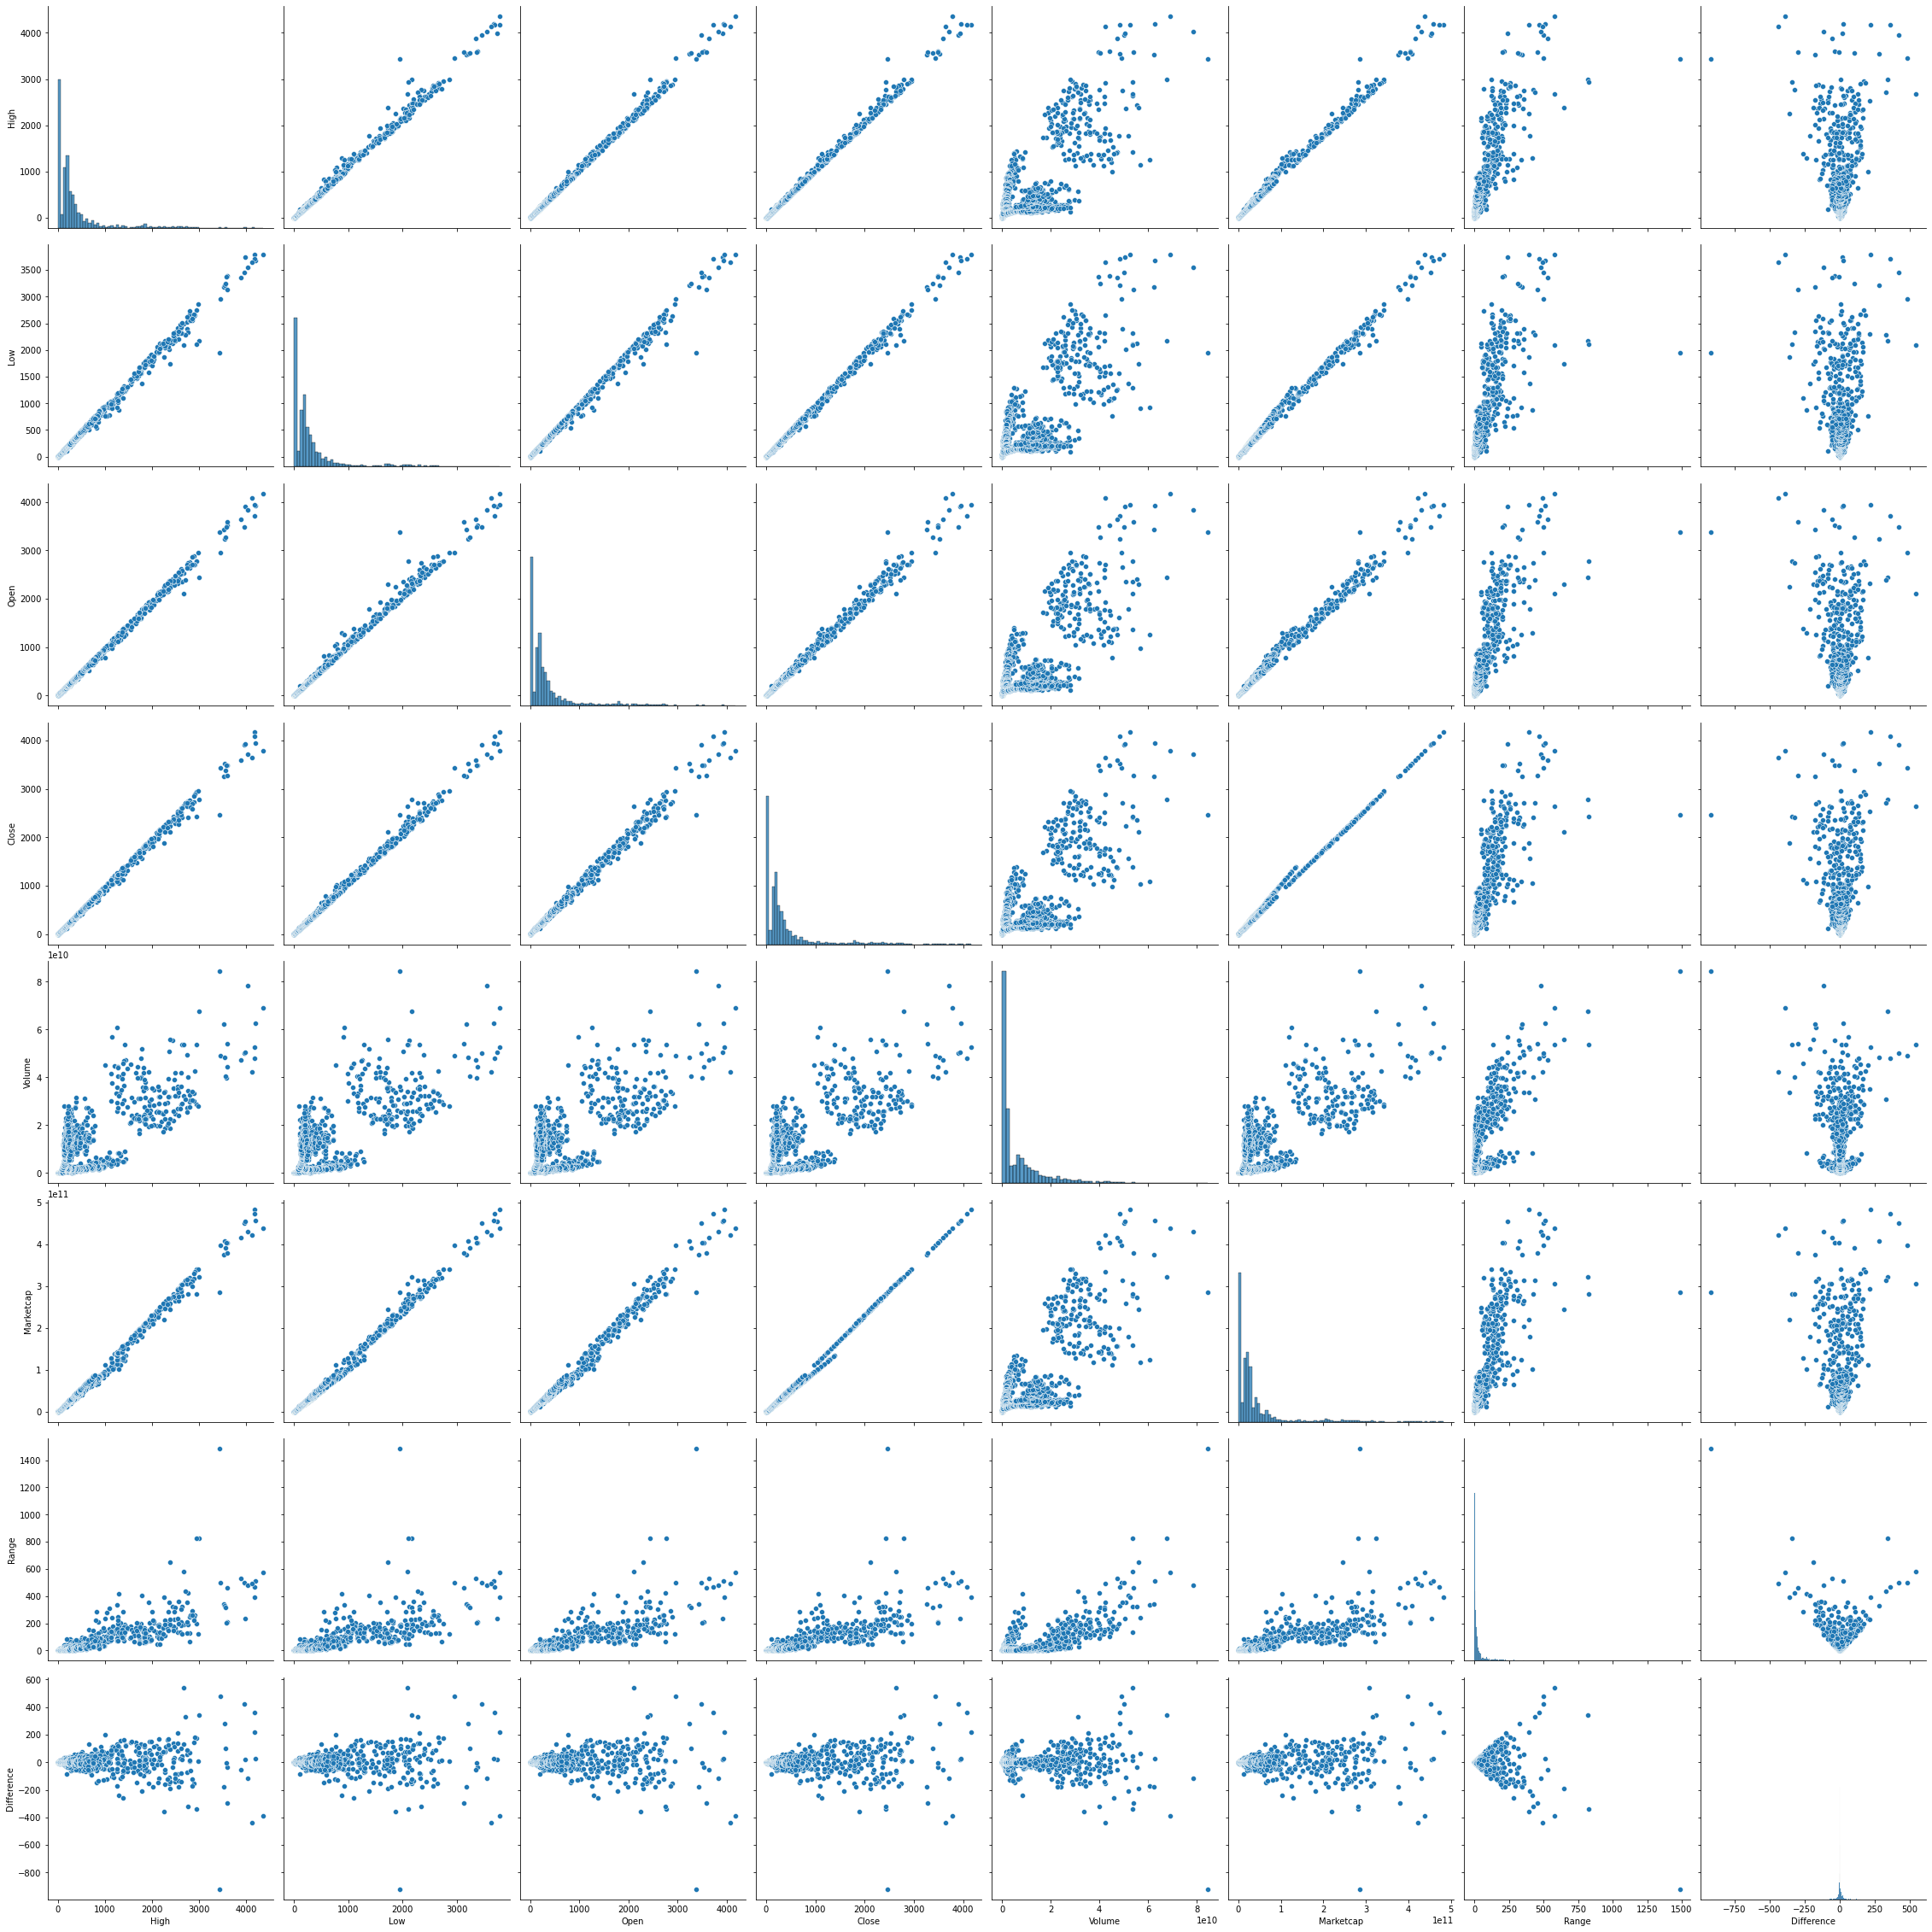

In [15]:
sns.pairplot(data,height=4);
